# Data Extraction

In [25]:
pip install spotipy

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set your Spotify API credentials
client_id = '8f92200d98544e9a950bb419d6d6b789'
client_secret = '02723c94123348209b5010f50660a9d5'
playlist_id = '4fKWFrj4zBDOJ2JFMGbWDz'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Function to get audio features, artist popularity, and genre for each track in a playlist
def get_playlist_details(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    details_list = []

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    for track in tracks:
        # Track details
        track_info = track['track']
        track_id = track_info['id']

        # Audio features
        audio_features = sp.audio_features([track_id])[0]

        # Artist details
        artist_info = track_info['artists'][0]
        artist_id = artist_info['id']

        # Artist popularity
        artist_popularity = sp.artist(artist_id)['popularity']

        # Artist genre (considering the first genre in the list)
        artist_genre = sp.artist(artist_id)['genres'][0] if sp.artist(artist_id)['genres'] else None

        details = {
            'Track Name': track_info['name'],
            'Artist Name': artist_info['name'],
            'Artist Popularity': artist_popularity,
            'Artist Genre': artist_genre,
            'Popularity': track_info['popularity'],
            'Explicit': track_info['explicit'],
            'Duration (ms)': track_info['duration_ms'],
            'Danceability': audio_features['danceability'],
            'Energy': audio_features['energy'],
            'Key': audio_features['key'],
            'Loudness': audio_features['loudness'],
            'Mode': audio_features['mode'],
            'Speechiness': audio_features['speechiness'],
            'Acousticness': audio_features['acousticness'],
            'Instrumentalness': audio_features['instrumentalness'],
            'Liveness': audio_features['liveness'],
            'Valence': audio_features['valence'],
            'Tempo': audio_features['tempo']
        }

        details_list.append(details)

    return details_list

# Get details for the playlist
playlist_details = get_playlist_details(playlist_id)

# Create a DataFrame from the details list
df = pd.DataFrame(playlist_details)

In [46]:
df

,Unnamed: 0,Track Name,Artist Name,Artist Popularity,Artist Genre,Popularity,Explicit,Duration_ms,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Winter Heat,Domo L'amante,0,NaN,0,True,105613,0.838,0.346,0,-11.866,0,0.4700,0.360000,0.000116,0.1060,0.5490,133.931
1,1,Broken,Lund,57,emo rap,0,True,200597,0.827,0.599,0,-2.046,1,0.0414,0.052400,0.000646,0.1080,0.1300,134.003
2,2,"no, the moon",Teen Suicide,51,lo-fi emo,0,False,152169,0.357,0.281,5,-12.809,1,0.0314,0.994000,0.844000,0.2730,0.2120,107.295
3,3,my new love,Elijah Who,52,lo-fi beats,0,False,65790,0.614,0.277,1,-11.943,0,0.0420,0.967000,0.891000,0.0698,0.2360,84.938
4,4,crush on you,Elijah Who,52,lo-fi beats,0,False,84023,0.578,0.172,1,-13.684,1,0.3500,0.883000,0.000003,0.4010,0.4240,138.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,Brian is the Most Beautiful,Memo Boy,56,weirdcore,2,False,225000,0.483,0.800,5,-8.596,0,0.0480,0.390000,0.848000,0.2130,0.3650,192.057
141,141,Morning Dew,Jaeden Camstra,48,NaN,49,False,70331,0.703,0.446,5,-11.149,0,0.0522,0.841000,0.249000,0.3800,0.2330,75.082
142,142,Horario,Jaeden Camstra,48,NaN,52,False,74675,0.802,0.445,3,-8.871,0,0.4070,0.810000,0.001150,0.2700,0.8500,78.773
143,143,Vito / Bad Boy,Headband Andy,41,rage rap,57,True,152762,0.701,0.520,1,-10.536,1,0.0395,0.031800,0.000003,0.3030,0.0782,130.011


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set your Spotify API credentials
client_id = '8f92200d98544e9a950bb419d6d6b789'
client_secret = '02723c94123348209b5010f50660a9d5'
playlist_id = '3O6O3bAkE3rJZ4j2sQtFg4'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Function to get audio features, artist popularity, and genre for each track in a playlist
def get_playlist_details(playlist_id, max_tracks=1450):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    details_list = []

    while results['next'] and len(tracks) < max_tracks:
        results = sp.next(results)
        tracks.extend(results['items'])

    for track in tracks[:max_tracks]:
        # Track details
        track_info = track['track']
        track_id = track_info['id']

        # Audio features
        audio_features = sp.audio_features([track_id])[0]

        # Artist details
        artist_info = track_info['artists'][0]
        artist_id = artist_info['id']

        # Artist popularity
        artist_popularity = sp.artist(artist_id)['popularity']

        # Artist genre (considering the first genre in the list)
        artist_genre = sp.artist(artist_id)['genres'][0] if sp.artist(artist_id)['genres'] else None

        details = {
            'Track Name': track_info['name'],
            'Artist Name': artist_info['name'],
            'Artist Popularity': artist_popularity,
            'Artist Genre': artist_genre,
            'Popularity': track_info['popularity'],
            'Explicit': track_info['explicit'],
            'Duration (ms)': track_info['duration_ms'],
            'Danceability': audio_features['danceability'],
            'Energy': audio_features['energy'],
            'Key': audio_features['key'],
            'Loudness': audio_features['loudness'],
            'Mode': audio_features['mode'],
            'Speechiness': audio_features['speechiness'],
            'Acousticness': audio_features['acousticness'],
            'Instrumentalness': audio_features['instrumentalness'],
            'Liveness': audio_features['liveness'],
            'Valence': audio_features['valence'],
            'Tempo': audio_features['tempo']
        }

        details_list.append(details)

    return details_list

# Get details for the playlist with a maximum of 1450 songs
playlist_details = get_playlist_details(playlist_id)

# Create a DataFrame from the details list
dfliked = pd.DataFrame(playlist_details)

In [47]:
dfliked

,Unnamed: 0,Track Name,Artist Name,Artist Popularity,Artist Genre,Popularity,Explicit,Duration_ms,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,All In A Dream,LP Giobbi,59,house,58,False,230015,0.705,0.524,2,-9.776,0,0.0320,0.112000,0.260000,0.1090,0.219,119.987
1,1,Usurper,NXCRE,40,NaN,57,False,215275,0.416,0.925,3,-3.872,0,0.0700,0.000123,0.000907,0.1350,0.219,135.037
2,2,World Domination,Joey Bada$$,72,conscious hip hop,60,True,162761,0.451,0.943,1,-1.598,1,0.2730,0.174000,0.455000,0.1510,0.911,79.394
3,3,Babydoll,Dominic Fike,75,alternative pop rock,84,False,97960,0.762,0.604,7,-5.296,0,0.1100,0.114000,0.000000,0.0271,0.847,168.007
4,4,No More Lies,Thundercat,70,afrofuturism,68,False,327217,0.602,0.835,10,-4.573,0,0.0413,0.092100,0.000064,0.1380,0.496,97.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1445,The Righteous & the Wicked,Red Hot Chili Peppers,82,alternative rock,22,True,248000,0.409,0.726,6,-10.601,0,0.0563,0.001840,0.000032,0.1240,0.715,166.394
1446,1446,Give It Away,Red Hot Chili Peppers,82,alternative rock,36,False,284266,0.683,0.989,9,-2.092,0,0.0616,0.005790,0.001080,0.0964,0.781,91.558
1447,1447,Blood Sugar Sex Magik,Red Hot Chili Peppers,82,alternative rock,25,False,271160,0.630,0.794,9,-10.200,0,0.0921,0.000282,0.429000,0.2980,0.836,146.574
1448,1448,Under the Bridge,Red Hot Chili Peppers,82,alternative rock,33,False,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275


# Data Processing

In [64]:
df=pd.read_csv('df.csv')
dfliked=pd.read_csv('dfliked.csv')

In [ ]:
import pandas as pd

# Assuming df is the training dataset and dfliked is the selecting dataset

# List of numerical variables
numerical_variables = ['Artist Popularity', 'Popularity', 'Duration (ms)', 'Danceability', 'Energy', 'Loudness',
                        'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# 1. Compute mean and standard deviation for each numerical variable in df
means = df[numerical_variables].mean()
std_devs = df[numerical_variables].std()

# 2. Apply the selective process to create selection criteria
selection_criteria = {}
for col in numerical_variables:
    lower_bound = means[col] - std_devs[col]
    upper_bound = means[col] + std_devs[col]
    selection_criteria[col] = (lower_bound, upper_bound)

# 3. Filter dfliked based on selection criteria
for col in numerical_variables:
    lower_bound, upper_bound = selection_criteria[col]
    dfliked = dfliked[(dfliked[col] >= lower_bound) & (dfliked[col] <= upper_bound)]


In [45]:
dfliked

,Unnamed: 0,Track Name,Artist Name,Artist Popularity,Artist Genre,Popularity,Explicit,Duration_ms,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,All In A Dream,LP Giobbi,59,house,58,False,230015,0.705,0.524,2,-9.776,0,0.0320,0.112000,0.260000,0.1090,0.219,119.987
1,1,Usurper,NXCRE,40,NaN,57,False,215275,0.416,0.925,3,-3.872,0,0.0700,0.000123,0.000907,0.1350,0.219,135.037
2,2,World Domination,Joey Bada$$,72,conscious hip hop,60,True,162761,0.451,0.943,1,-1.598,1,0.2730,0.174000,0.455000,0.1510,0.911,79.394
3,3,Babydoll,Dominic Fike,75,alternative pop rock,84,False,97960,0.762,0.604,7,-5.296,0,0.1100,0.114000,0.000000,0.0271,0.847,168.007
4,4,No More Lies,Thundercat,70,afrofuturism,68,False,327217,0.602,0.835,10,-4.573,0,0.0413,0.092100,0.000064,0.1380,0.496,97.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1445,The Righteous & the Wicked,Red Hot Chili Peppers,82,alternative rock,22,True,248000,0.409,0.726,6,-10.601,0,0.0563,0.001840,0.000032,0.1240,0.715,166.394
1446,1446,Give It Away,Red Hot Chili Peppers,82,alternative rock,36,False,284266,0.683,0.989,9,-2.092,0,0.0616,0.005790,0.001080,0.0964,0.781,91.558
1447,1447,Blood Sugar Sex Magik,Red Hot Chili Peppers,82,alternative rock,25,False,271160,0.630,0.794,9,-10.200,0,0.0921,0.000282,0.429000,0.2980,0.836,146.574
1448,1448,Under the Bridge,Red Hot Chili Peppers,82,alternative rock,33,False,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275


In [ ]:
# Assuming 'df' and 'dfliked' are your DataFrames

# Filter 'dfliked' based on 'df' Artist Genres
dfgenre = dfliked[dfliked['Artist Genre'].isin(df['Artist Genre'])].reset_index(drop=True)

# Display the resulting DataFrame
dfgenre


In [ ]:
dfgenre = dfgenre.dropna(subset=['Artist Genre'])

In [ ]:
dfgenre

# Data Visualization

In [21]:
pip install seaborn

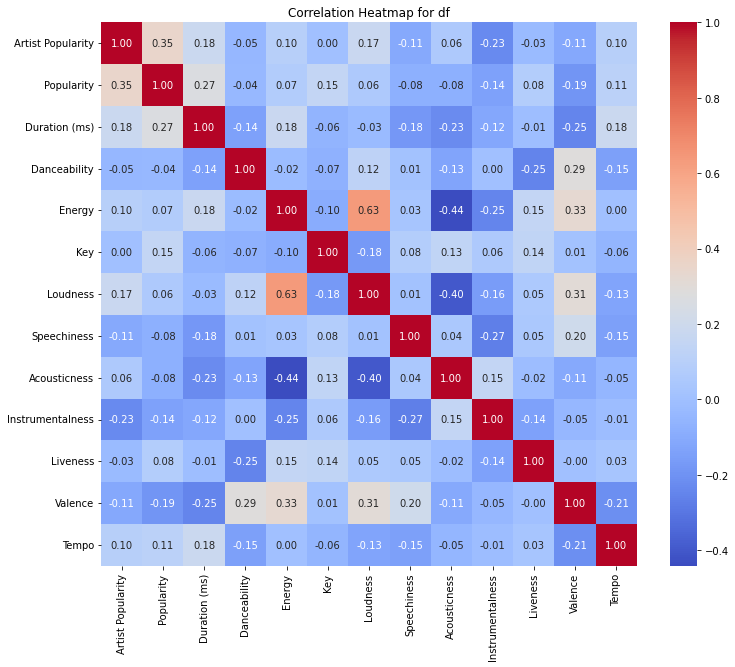

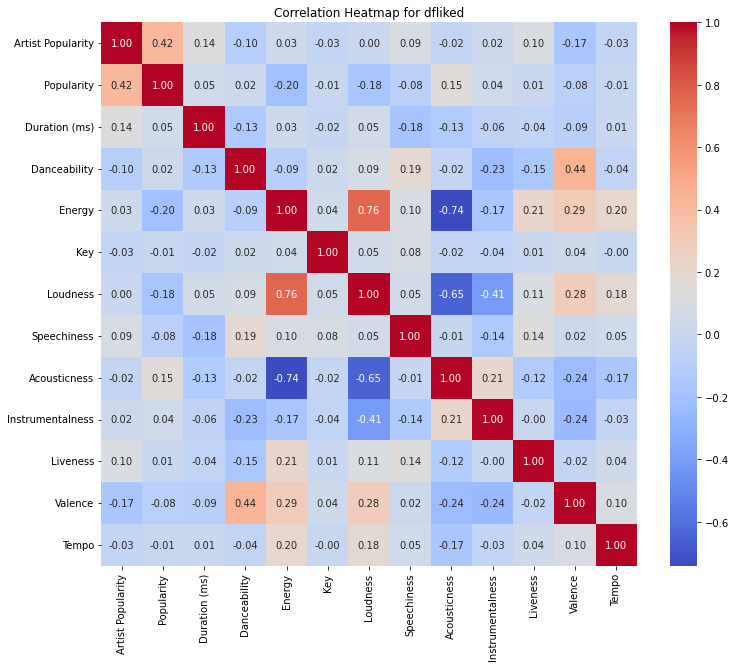

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'dfliked' are your DataFrames

# Define the list of variables for visualization
variables = [
     'Artist Popularity', 
    'Popularity',  'Duration (ms)', 'Danceability', 'Energy',
    'Key', 'Loudness', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]

# Function to create visualizations
def create_visualizations(dataframe, title):
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(dataframe[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {title}')
    plt.show()


# Create visualizations for 'df'
create_visualizations(df, 'df')

# Create visualizations for 'dfliked'
create_visualizations(dfliked, 'dfliked')

plt.show()


In [24]:
df.info()

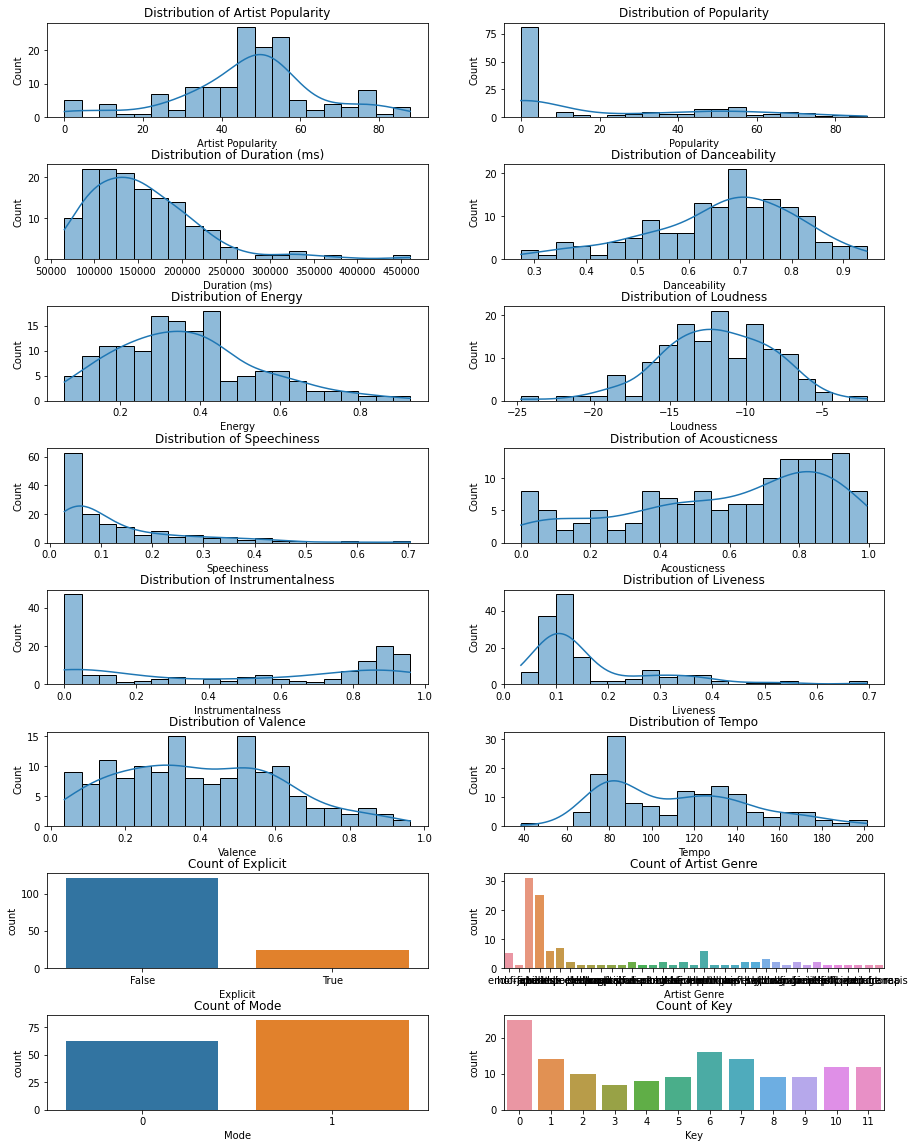

In [83]:
# can you fix this code 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Define the list of variables for visualization
numerical_variables = [
    'Artist Popularity', 'Popularity', 'Duration (ms)', 'Danceability',
    'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]

categorical_variables = ['Explicit','Artist Genre','Mode','Key']

# Compute grid size: Take into account the numerical and categorical plots
n_total_vars = len(numerical_variables) + len(categorical_variables)
n_cols = 2
n_rows = n_total_vars // n_cols + n_total_vars % n_cols

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Flattens the 2D grid to make it easier to iterate over 
axes = axes.flatten()

# Plot numerical variables
for i, variable in enumerate(numerical_variables):
    ax = axes[i]
    sns.histplot(df[variable], ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {variable}')

# Plot categorical variables
start_row = len(numerical_variables)
for i, variable in enumerate(categorical_variables):
    ax = axes[start_row + i]
    sns.countplot(x=variable, data=df, ax=ax)
    ax.set_title(f'Count of {variable}')

plt.show()

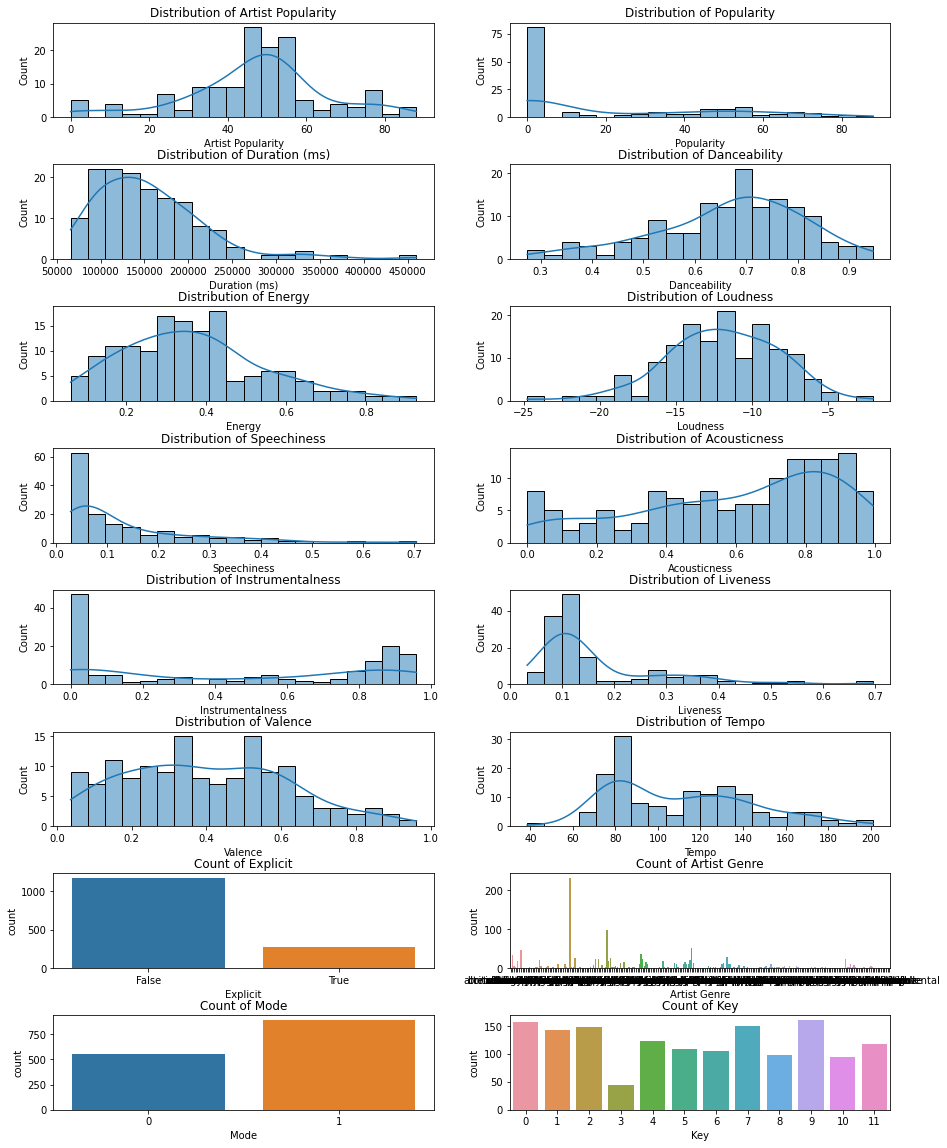

In [84]:
# can you fix this code 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Define the list of variables for visualization
numerical_variables = [
    'Artist Popularity', 'Popularity', 'Duration (ms)', 'Danceability',
    'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]

categorical_variables = ['Explicit','Artist Genre','Mode','Key']

# Compute grid size: Take into account the numerical and categorical plots
n_total_vars = len(numerical_variables) + len(categorical_variables)
n_cols = 2
n_rows = n_total_vars // n_cols + n_total_vars % n_cols

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Flattens the 2D grid to make it easier to iterate over 
axes = axes.flatten()

# Plot numerical variables
for i, variable in enumerate(numerical_variables):
    ax = axes[i]
    sns.histplot(df[variable], ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {variable}')

# Plot categorical variables
start_row = len(numerical_variables)
for i, variable in enumerate(categorical_variables):
    ax = axes[start_row + i]
    sns.countplot(x=variable, data=dfliked, ax=ax)
    ax.set_title(f'Count of {variable}')

plt.show()

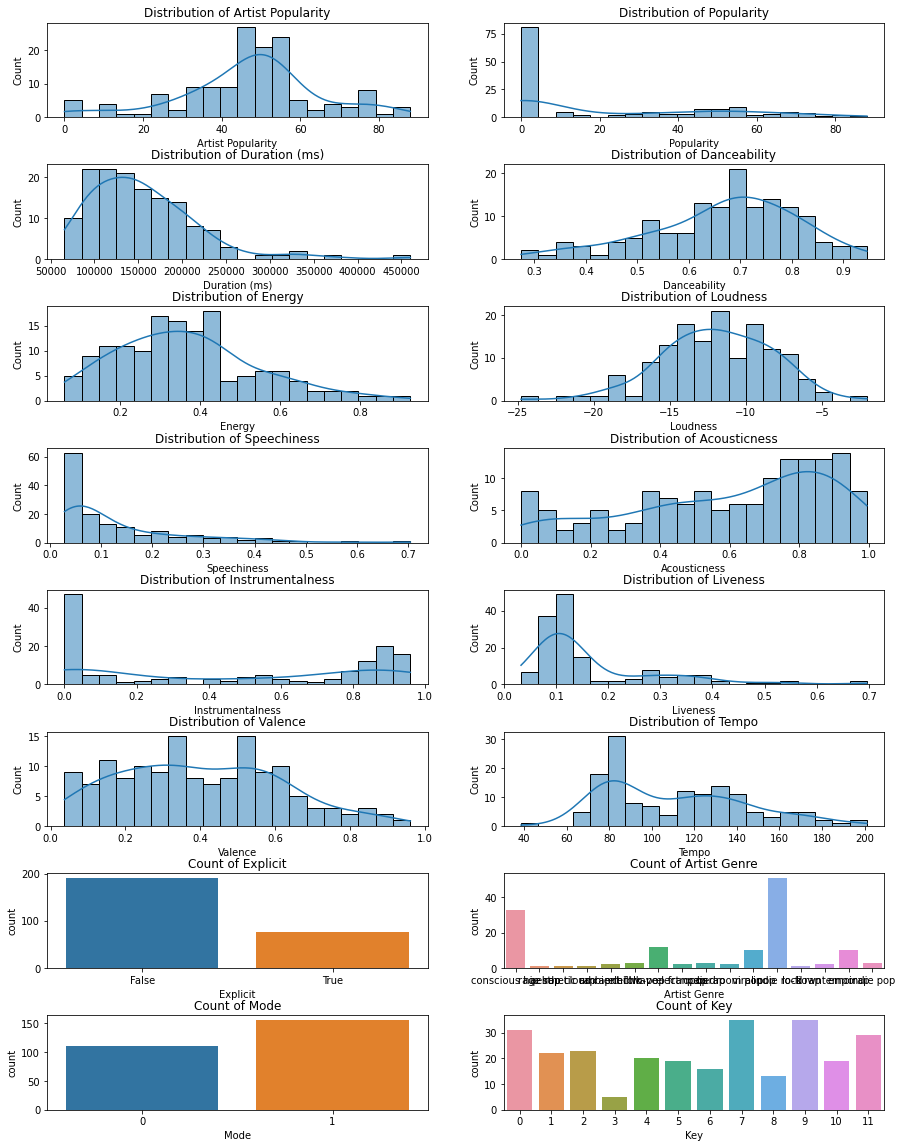

In [85]:
# can you fix this code 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Define the list of variables for visualization
numerical_variables = [
    'Artist Popularity', 'Popularity', 'Duration (ms)', 'Danceability',
    'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]

categorical_variables = ['Explicit','Artist Genre','Mode','Key']

# Compute grid size: Take into account the numerical and categorical plots
n_total_vars = len(numerical_variables) + len(categorical_variables)
n_cols = 2
n_rows = n_total_vars // n_cols + n_total_vars % n_cols

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Flattens the 2D grid to make it easier to iterate over 
axes = axes.flatten()

# Plot numerical variables
for i, variable in enumerate(numerical_variables):
    ax = axes[i]
    sns.histplot(df[variable], ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {variable}')

# Plot categorical variables
start_row = len(numerical_variables)
for i, variable in enumerate(categorical_variables):
    ax = axes[start_row + i]
    sns.countplot(x=variable, data=dfgenre, ax=ax)
    ax.set_title(f'Count of {variable}')

plt.show()

# Hypothesis Testing

In [81]:
from scipy.stats import ttest_rel
import pandas as pd

# Assuming df and dfliked are your dataframes
# Make sure both dataframes have the same columns in the same order

# Select numerical features
numerical_features = ['Duration (ms)', 'Tempo', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Artist Popularity', 'Popularity']

# Extract the numerical features for both dataframes
df_numerical = df[numerical_features]
dfliked_numerical = dfliked[numerical_features]

# Drop rows with missing values
df_combined_numerical = pd.concat([df_numerical, dfliked_numerical], axis=1).dropna()

# Perform paired t-test
t_statistic, p_values = ttest_rel(df_combined_numerical.iloc[:, :len(numerical_features)], df_combined_numerical.iloc[:, len(numerical_features):])

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Loop through each feature and print the results
for feature, p_value in zip(numerical_features, p_values):
    print(f"P-value for {feature}: {p_value:.4f}")

    # Compare each p-value to the significance level
    if p_value < alpha:
        print(f"  Reject the null hypothesis for {feature}. There is enough evidence to suggest a significant difference.")
    else:
        print(f"  Fail to reject the null hypothesis for {feature}. There is not enough evidence to suggest a significant difference.")

P-value for Duration (ms): 0.0000
  Reject the null hypothesis for Duration (ms). There is enough evidence to suggest a significant difference.
P-value for Tempo: 0.0277
  Reject the null hypothesis for Tempo. There is enough evidence to suggest a significant difference.
P-value for Danceability: 0.0286
  Reject the null hypothesis for Danceability. There is enough evidence to suggest a significant difference.
P-value for Energy: 0.0000
  Reject the null hypothesis for Energy. There is enough evidence to suggest a significant difference.
P-value for Key: 0.1406
  Fail to reject the null hypothesis for Key. There is not enough evidence to suggest a significant difference.
P-value for Loudness: 0.0000
  Reject the null hypothesis for Loudness. There is enough evidence to suggest a significant difference.
P-value for Speechiness: 0.1120
  Fail to reject the null hypothesis for Speechiness. There is not enough evidence to suggest a significant difference.
P-value for Acousticness: 0.0000
 

# k-Nearest Neighbor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Assume X_df and X_dfliked are the selected features from df and dfliked
X_df = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]
X_dfgenre = dfgenre[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Standardize the features
scaler = StandardScaler()
X_df_scaled = scaler.fit_transform(X_df)
X_dfgenre_scaled = scaler.transform(X_dfgenre)

# Train KNN model
knn_model = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')  # You can adjust n_neighbors
knn_model.fit(X_dfgenre_scaled)

# Predict recommendations
distances, indices = knn_model.kneighbors(X_df_scaled)

# Extract recommended songs from dfliked
recommended_songs1 = dfgenre.iloc[indices.flatten()]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Assume X_df and X_dfliked are the selected features from df and dfliked
X_df = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]
X_dfgenre = dfgenre[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Standardize the features
scaler = StandardScaler()
X_df_scaled = scaler.fit_transform(X_df)
X_dfgenre_scaled = scaler.transform(X_dfgenre)

# Train KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')  # You can adjust n_neighbors
knn_model.fit(X_dfgenre_scaled)

# Predict recommendations
distances, indices = knn_model.kneighbors(X_df_scaled)

# Extract recommended songs from dfliked
recommended_songs5 = dfgenre.iloc[indices.flatten()]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Assume X_df and X_dfliked are the selected features from df and dfliked
X_df = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]
X_dfgenre = dfgenre[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Standardize the features
scaler = StandardScaler()
X_df_scaled = scaler.fit_transform(X_df)
X_dfgenre_scaled = scaler.transform(X_dfgenre)

# Train KNN model
knn_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')  # You can adjust n_neighbors
knn_model.fit(X_dfgenre_scaled)

# Predict recommendations
distances, indices = knn_model.kneighbors(X_df_scaled)

# Extract recommended songs from dfliked
recommended_songs10 = dfgenre.iloc[indices.flatten()]

In [ ]:
recommended_songs1

In [ ]:
recommended_songs5

In [ ]:
recommended_songs10

In [ ]:
import pandas as pd

# Assuming 'recommended_songs' is your DataFrame

# Count the occurrences of each song in the recommendations
song_counts1 = recommended_songs1['Track Name'].value_counts()

# Select the top 5 most recommended songs
top_recommended_songs1 = song_counts1.head(10).index

# Create 'dfchosen' DataFrame with the most recommended songs
dfchosen1 = recommended_songs1[recommended_songs1['Track Name'].isin(top_recommended_songs1)].drop_duplicates(subset='Track Name').head(10).reset_index(drop=True)


In [ ]:
import pandas as pd

# Assuming 'recommended_songs' is your DataFrame

# Count the occurrences of each song in the recommendations
song_counts5 = recommended_songs5['Track Name'].value_counts()

# Select the top 5 most recommended songs
top_recommended_songs5 = song_counts5.head(10).index

# Create 'dfchosen' DataFrame with the most recommended songs
dfchosen5 = recommended_songs5[recommended_songs5['Track Name'].isin(top_recommended_songs5)].drop_duplicates(subset='Track Name').head(10).reset_index(drop=True)

In [ ]:
import pandas as pd

# Assuming 'recommended_songs' is your DataFrame

# Count the occurrences of each song in the recommendations
song_counts10 = recommended_songs10['Track Name'].value_counts()

# Select the top 5 most recommended songs
top_recommended_songs10 = song_counts10.head(10).index

# Create 'dfchosen' DataFrame with the most recommended songs
dfchosen10 = recommended_songs10[recommended_songs10['Track Name'].isin(top_recommended_songs10)].drop_duplicates(subset='Track Name').head(10).reset_index(drop=True)

In [ ]:
dfchosen10

In [ ]:
dfchosen5

In [ ]:
dfchosen1